## Исследование кино


Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.
 
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno

In [314]:
try:
    data = pd.read_csv('datasets/mkrf_movies.csv',sep=',')
    data_2 = pd.read_csv('datasets/mkrf_shows.csv',sep=',')
except:
    data = pd.read_csv('/datasets/mkrf_movies.csv',sep=',')
    data_2 = pd.read_csv('/datasets/mkrf_shows.csv',sep=',')

In [315]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [317]:
data_2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [318]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Столбец для объединения - puNumber, но в разных файлах он имеет разный тип. Попробуем привести в int данные в data

In [319]:
#data['puNumber'] = data['puNumber'].astype('int')

Вышла ошибка из за слова "нет" в какой то из строк, проверим

In [320]:
data[data['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Воспользуемся сторонними источниками для заполнения ошибки, так как во второй таблице данных недостаточно

In [321]:
data['puNumber'] = data['puNumber'].replace('нет','111009614')
data[data['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Оказывается, такая запись уже есть, но указаны разные даты премьер, оставим более позднюю

In [322]:
data = data.drop(index=1797)
data[data['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
data['puNumber'] = data['puNumber'].astype('int')

Данные готовы к объединению таблиц

In [324]:
data = data.merge(data_2, on='puNumber', how='outer')

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Таблицы объединены, данные из mkrf_shows сохранены

### Предобработка данных

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Замена типов данных требуется в следующих столбцах:
- show_start_date - datetime
- ratings - float



Также на предыдущем шаге заменили тип данных в столбце puNumber

In [327]:
#data_1['ratings'] = data_1['ratings'].astype('float')

Сразу заменить типы данных не получается, так как есть мешающие значения

In [328]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [329]:
data['ratings'] = data['ratings'].replace('%','',regex=True)
data['ratings'] = data['ratings'].astype('float64')
data.loc[data['ratings']>10, 'ratings'] = data.loc[data['ratings']>10, 'ratings']/10
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Теперь все значения приведены к одному типу записи и переведены в тип float

In [330]:
data['show_start_date'].isna().sum()

0

In [331]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Обработка типов данных завершена, все необходимые изменения внесены

In [332]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


<Axes: >

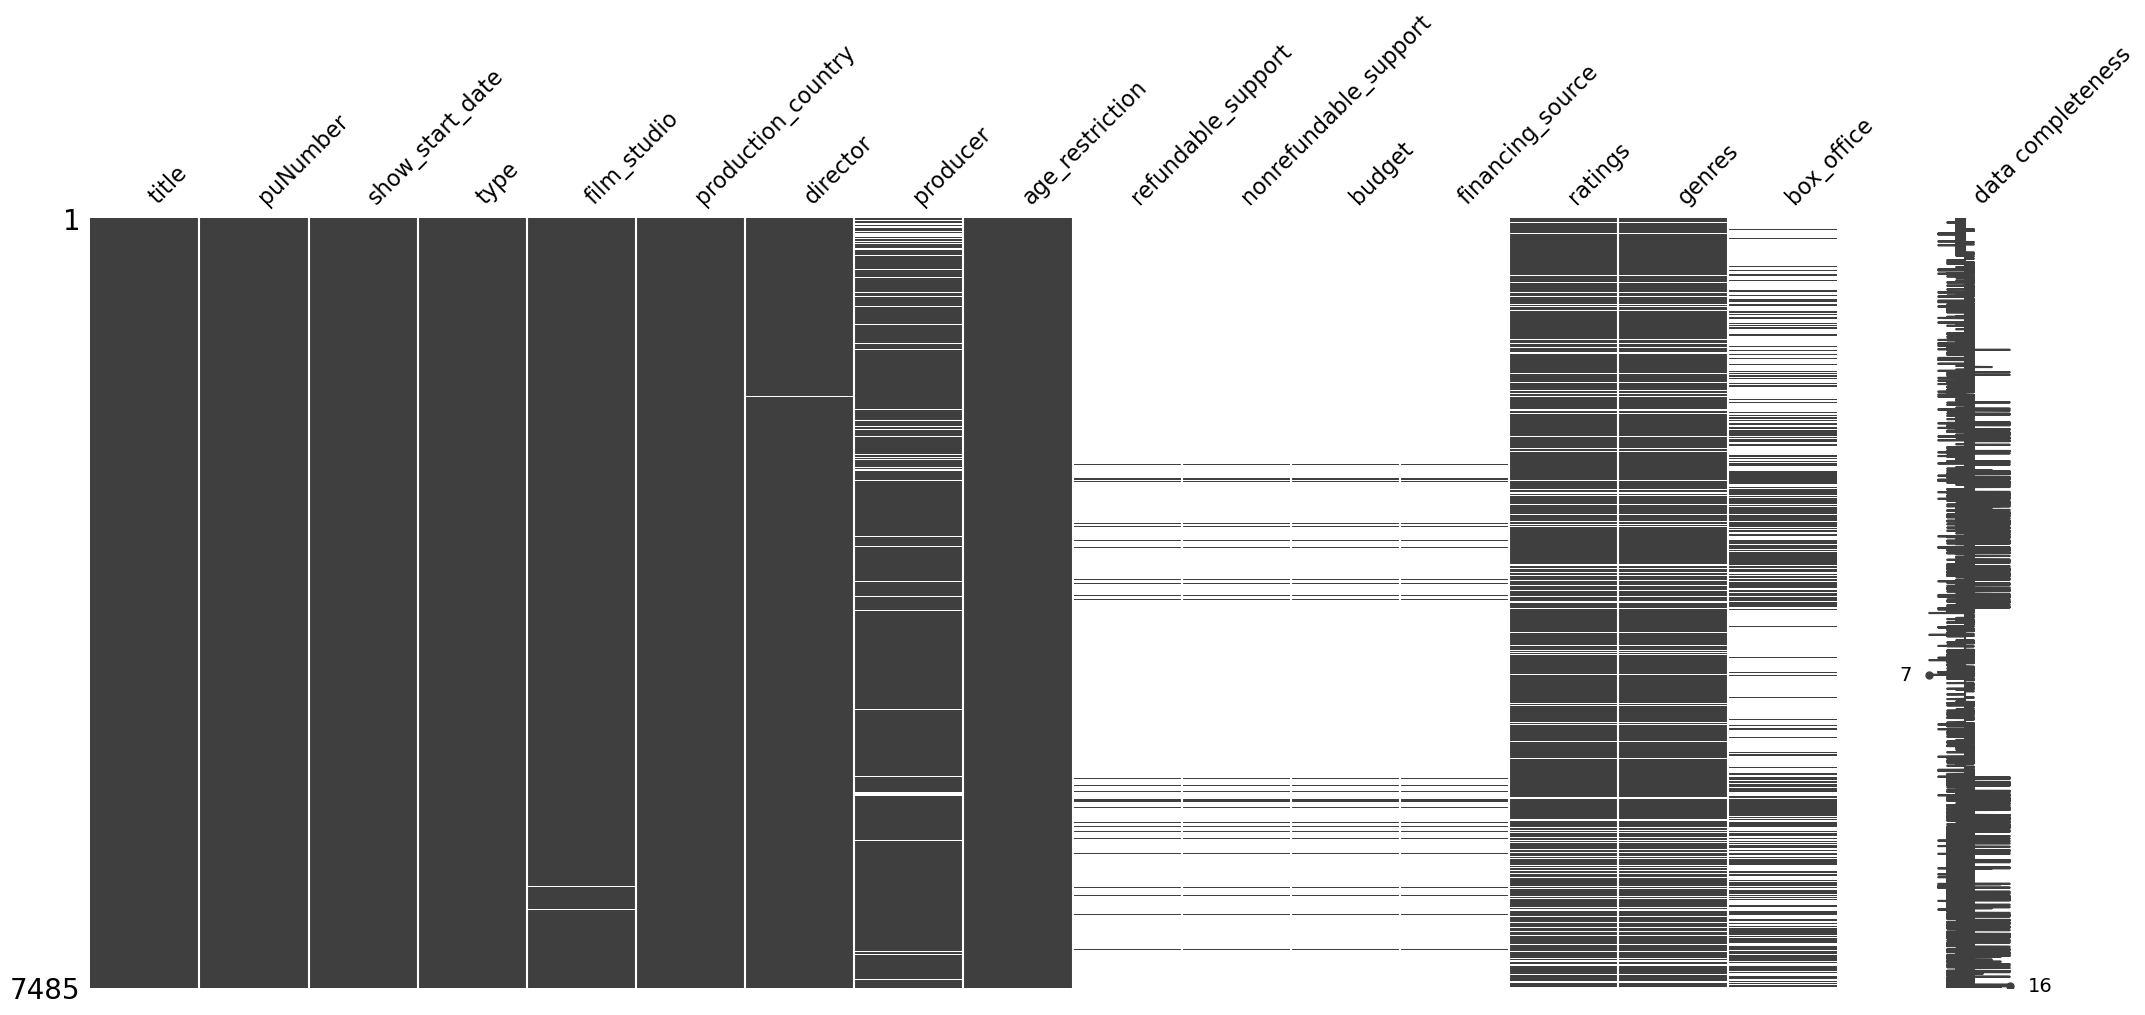

In [333]:
msno.matrix(data, labels=True)

Пропуски есть в стобцах:
- producer - заменим на "неизвестно", если не найдем данные
- refundable_support
- nonrefundable_support
- budget
- financing_source
- ratings - заменим на актуальные данные то, что можно заменить
- genres - заменим на "неизвестно"
- box_office - мы сами допустили эти пропуски, оставим как есть

Поражающее количество пропусков в столбцах : refundable_support, nonrefundable_support, budget, financing_source. Эти пропуски трогать не будем. Для начала рассмотрим столбцы с маленьким количеством пропусков

In [334]:
#data[data['ratings'].isna()].head(50)

In [335]:
for i in [30]:
    data.loc[i,'ratings'] = 5.2

for i in [415]:
    data.loc[i,'ratings'] = 5.3

for i in [2469]:
    data.loc[i,'ratings'] = 5.5

for i in [519,906]:
    data.loc[i,'ratings'] = 5.6

for i in [252]:
    data.loc[i,'ratings'] = 5.7

for i in [203,2399,2780,2788,2838]:
    data.loc[i,'ratings'] = 5.8
    
for i in [306,2354,2504,2750]:
    data.loc[i,'ratings'] = 5.9

In [336]:
for i in [2147,]:
    data.loc[i,'ratings'] = 6.0

for i in [959,966,2295]:
    data.loc[i,'ratings'] = 6.1

for i in [694,787,1482]:
    data.loc[i,'ratings'] = 6.2

for i in [706,1168,1280,2791]:
    data.loc[i,'ratings'] = 6.3

for i in [288,323,674]:
    data.loc[i,'ratings'] = 6.4

for i in [1273]:
    data.loc[i,'ratings'] = 6.5

for i in [90,198,1034,1258,1992]:
    data.loc[i,'ratings'] = 6.6

for i in [102,805,835,1633,1919,2290,2556,2631,2897,2970]:
    data.loc[i,'ratings'] = 6.7

for i in [24,76,3066]:
    data.loc[i,'ratings'] = 6.8
    
for i in [610,1437]:
    data.loc[i,'ratings'] = 6.9

In [337]:
for i in [1054,2732]:
    data.loc[i,'ratings'] = 7.0

for i in [367,575,2736,2881]:
    data.loc[i,'ratings'] = 7.1

for i in [239,3043]:
    data.loc[i,'ratings'] = 7.2

for i in [2449,2530,2705]:
    data.loc[i,'ratings'] = 7.3

for i in [2318,2756,3002]:
    data.loc[i,'ratings'] = 7.4

for i in [2901]:
    data.loc[i,'ratings'] = 7.5

for i in [1857,2734]:
    data.loc[i,'ratings'] = 7.6

for i in [2322]:
    data.loc[i,'ratings'] = 7.7

for i in [2882]:
    data.loc[i,'ratings'] = 7.8
    
for i in [2850]:
    data.loc[i,'ratings'] = 7.9

In [338]:
for i in [1306,2778]:
    data.loc[i,'ratings'] = 8.0
    
for i in [2885,2906]:
    data.loc[i,'ratings'] = 8.1
    
for i in [3081,3088]:
    data.loc[i,'ratings'] = 8.2

for i in [2919]:
    data.loc[i,'ratings'] = 8.4
    
for i in [2858]:
    data.loc[i,'ratings'] = 8.7
    
for i in [1410,]:
    data.loc[i,'ratings'] = 8.8

In [339]:
data.loc[109,'ratings'] = 1.4
data.loc[117,'ratings'] = 3.9
data.loc[152,'ratings'] = 3.6
data.loc[329,'ratings'] = 3.4
data.loc[810,'ratings'] = 3.2
data.loc[815,'ratings'] = 2.6
data.loc[1740,'ratings'] = 4.7
data.loc[2796,'ratings'] = 4.6

In [340]:
#data[data['ratings'].isna()].loc[787:1400]

In [341]:
#data[data['ratings'].isna()].loc[1306:2400]

In [342]:
#data[data['ratings'].isna()].loc[2400:2960]

In [343]:
#data[data['ratings'].isna()].loc[2960:]

In [344]:
len(data[data['ratings'].isna()])

955

Пропуски в рейтинге заполнены с помощью сайта Кинопоиск. В итоге количество пропусков уменьшилось почти в 2 раза

In [345]:
#data[data['producer'].isna()].head(50)

In [346]:
data.loc[206,'producer'] = 'А.Сидоров, М.Кожурничева, М.Эль'
data.loc[260,'producer'] = 'Б.Гиллер, Э.Крапивский, Генри С.Розенталь'
data.loc[346,'producer'] = 'А.Сидоров, Р.Дишдишян, М.Китаев'
data.loc[478,'producer'] = 'А.Куликов, Р.Устинов, А. Петрухин'

In [347]:
#data[data['producer'].isna()].loc[1000:]

In [348]:
data.loc[1051,'producer'] = 'Р.Пэрис, Э.Феффер, А.Рипп'
data.loc[1121,'producer'] = 'Э.Толенадо, О.Накаш, М.Кулин'
data.loc[1459,'producer'] = 'Джанлука Пассоне'
data.loc[1565,'producer'] = 'Е.Коссон'
data.loc[1722,'producer'] = 'Kewal Garg, Хетви Кариа, Санджай Роутрай'
data.loc[1821,'producer'] = 'Хирокадзу Корээда, Каору Мацудзаки, Хидзири Тагути'
data.loc[1919,'producer'] = 'Антония Барнард, Розмари Блайт, Паоло Коломбо'
data.loc[2478,'producer'] = 'Саймон Босуэлл, Клер Джонс, Тим Лиг'
data.loc[2553,'producer'] = 'Пьер-Оливье Барде'
data.loc[2703,'producer'] = 'Фернандо Де Фуэнтес, Хосе С. Гарсиа де Летона, Барри Брукер'
data.loc[2726,'producer'] = 'Наоко Эндо, Хирохиса Кикути, Нобухиро Кикути'
data.loc[2742,'producer'] = 'Mitsuko Kitajima, Кэн Сасаки'
data.loc[2815,'producer'] = 'Дзюнъити Сато, Таку Мацуо, Норико Одзаки'
data.loc[3064,'producer'] = 'Julia Cöllen, Томас Тильш'
data.loc[3077,'producer'] = 'Бретт Попплуэлл, Эндрю Уайт, Микаэл Борглунд'
data.loc[3089,'producer'] = 'Ульрих Зайдль, Сигрид Дюэкьер, Пернилле Роуз Гронкъер'
data.loc[3136,'producer'] = 'Майкл Лондон, Бруна Папандреа, Дэвид Рубин'

In [349]:
len(data[data['producer'].isna()])

565

Данные заполнены с помощью Кинопоиска

In [350]:
data['producer']=data['producer'].fillna('неизвестно')
data['genres']=data['genres'].fillna('неизвестно')
data['ratings']=data['ratings'].fillna(0)

Нулевые значения в рейтинге легко отбросим при анализе, так как в основном списке нулевых значений не было

In [351]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,0.000000
age_restriction,0.000000
refundable_support,96.000000


Заполнение пропусков завершено, пропуски по некоторым столбцам оставим в таком же виде

In [352]:
data.duplicated().sum()

0

Явных дубликатов по строкам не обнаружено. Рассмотрим дубликаты в столбцах номера и названия

In [353]:
data['puNumber'].duplicated().sum()

2

In [354]:
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Обнаружили 2 повторяющихся номера

In [355]:
data[data['puNumber']==221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Этот номер повторяется для разных фильмов, поэтому оставим оба для более успешного анализа

In [356]:
data[data['puNumber']==221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [357]:
data = data.drop(index=5067)

In [358]:
data['title'].duplicated().sum()

714

In [359]:
data[data['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Просто удалять строки нельзя, так как у дубликатов в графе сборов стоят разные значения, значит при разных прокатах в кинотеатрах была разная выручка. Не будем объединять эти строки и на этапе исследования рассмотрим, насколько эффективными бывают повторные прокаты

Искать дубликаты в других столбцах не имеет смысла, так как повторения в них возможны. Этап обработки дубликатов завершен

Категориальные столбцы это - genres, type, production_country, age_restriction, producer, director

In [360]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [361]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [362]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [363]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [364]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [365]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [366]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

В данных столбцах видны дубликаты в уникальных значениях, также есть ошибки при вводе данных - лишние пробелы, неправильные буквы и пр. Дубликаты появляются так как отдельные значения , например "Россия" и "Россия-Ирландия" не объединяются по названию Россия, "Россия-Ирландия" и "Россия, Ирландия" разные значения по таблице, но смысл несут одинаковый. То же встречается и в остальных столбцах. В столбце ограничений по возрасту появлись значения типа фильма

In [367]:
data['type'] = data['type'].str.strip()

In [368]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Категория типов фильмов обновлена, лишних пробелов нет

Столбец рейтинга исправили ранее, оставшиеся количественные значения - box_office, refundable_support, nonrefundable_support	budget

       refundable_support  nonrefundable_support        budget    box_office
count        3.320000e+02           3.320000e+02  3.320000e+02  3.158000e+03
mean         1.186446e+07           4.898099e+07  1.272297e+08  7.647870e+07
std          2.491656e+07           5.998012e+07  1.885883e+08  2.403531e+08
min          0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00
25%          0.000000e+00           2.500000e+07  4.200000e+07  8.623900e+04
50%          0.000000e+00           3.000000e+07  6.864992e+07  2.327988e+06
75%          1.500000e+07           4.037500e+07  1.419853e+08  2.397967e+07
max          1.800000e+08           4.000000e+08  2.305074e+09  3.073569e+09
[[<Axes: title={'center': 'refundable_support'}>
  <Axes: title={'center': 'nonrefundable_support'}>]
 [<Axes: title={'center': 'budget'}>
  <Axes: title={'center': 'box_office'}>]]


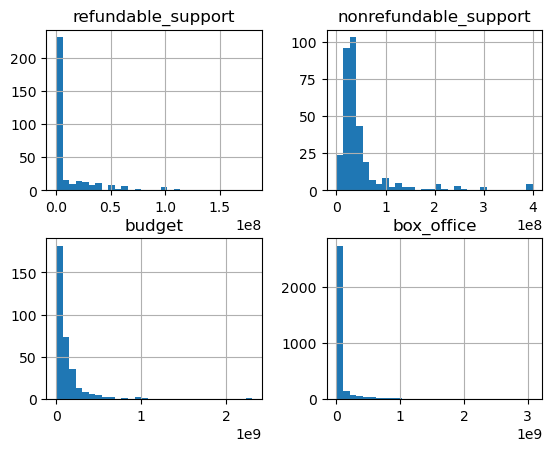

In [369]:
list_data=['refundable_support', 'nonrefundable_support',
          'budget', 'box_office']
print(data[list_data].describe())
print(data[list_data].hist(bins=30))

Значение общего бюджета ожидаемо выше, чем выплаты государственной поддержки. Данные из box_office имеют длинный хвост на большие сборы от проката.

Посмотрим, есть ли строки, где выплаты больше бюджета, такие строки - ошибочные

In [370]:
data[data['budget']<(data['refundable_support']+data['nonrefundable_support'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Во всех этих строках бюджет нулевой, скорее всего данные не указали, заменим хотя бы на сумму государственной поддержки

In [371]:
def budget(value):
    if value['budget']<(value['refundable_support']+value['nonrefundable_support']):
        return value['refundable_support']+value['nonrefundable_support']
    return value['budget']

data['budget_new'] = data.apply(budget, axis=1)

In [372]:
data[data['budget']<(data['refundable_support']+data['nonrefundable_support'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_new
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,23000000.0
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,75000000.0
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,80000000.0
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,20000000.0
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,160000000.0
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,59000000.0
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,35000000.0
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,6000000.0
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,70000000.0
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,250000000.0


Новое значение бюджета добавили в новый столбец, чтобы не терять данные об отсутствующих значениях

In [373]:
data['show_year'] = pd.DatetimeIndex(data['show_start_date']).year

In [374]:
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]
data['main_director'] = data['main_director'].str.strip()
data['main_genre'] = data['main_genre'].str.strip()

In [375]:
data['support_part'] = (data['refundable_support']+data['nonrefundable_support'])/data['budget']

In [376]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,budget_new,show_year,main_director,main_genre,support_part
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика,NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,7.7,драма,NaN,NaN,2016,В.Абдрашитов,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,8.3,"мелодрама,комедия",2700.0,NaN,2013,В.Меньшов,мелодрама,NaN
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,NaN,2014,Джон Туртурро,мюзикл,NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,...,NaN,NaN,8.0,"комедия,криминал",NaN,NaN,2016,Эрик Беснард,комедия,NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,неизвестно,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,7.8,"мелодрама,комедия",NaN,NaN,2014,В.Титов,мелодрама,NaN


Все необходимые столбцы добавлены

Вывод по разделу: в результате предобработки данных были выполнены шаги:
1. Заменены типы данных
2. Заполнены пропуски, где это возможно. В некоторых столбцах с наибольшим количеством пропусков - пропуски оставили.
3. Удалены неявные дубликаты, явных дубликатов не обнаружено
4. Устранены ошибки в столбце типа фильма
5. Заполнены некоторые недостающие количественные данные
6. Добавлены новые столбцы: год выпуска в прокат, главный режиссер, главный жанр, доля государственной поддержки в бюджете

### Исследовательский анализ данных


show_year
2010    984
2019    930
2018    891
2016    818
2014    806
2015    705
2013    630
2011    622
2012    593
2017    505
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


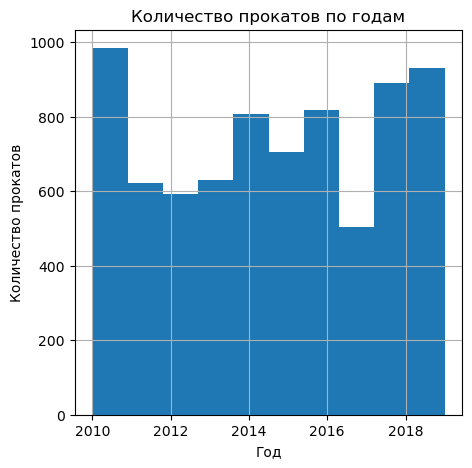

In [377]:
print(data['show_year'].value_counts())
print(data['show_year'].hist(bins=10,figsize=(5,5)))
plt.title('Количество прокатов по годам')
plt.ylabel('Количество прокатов')
plt.xlabel('Год')
plt.show()

In [378]:
print(data['box_office'].isna().sum())
print(data['show_year'].isna().sum())

4326
0


Пропуски в данных о выручке объясняли выше
Пропусков в данных по году не обнаружено. Провести предложенный анализ не сможем. Есть пропущенные данные о производстве фильмов, но о прокате все данные есть

С каждым годом количество фильмов увеличивается

show_year
2010    2.313004e+04
2011    1.293832e+05
2012    5.433924e+04
2013    1.619549e+05
2014    2.668442e+07
2015    8.494057e+07
2016    9.100057e+07
2017    1.360328e+08
2018    1.045651e+08
2019    9.136926e+07
Name: box_office, dtype: float64


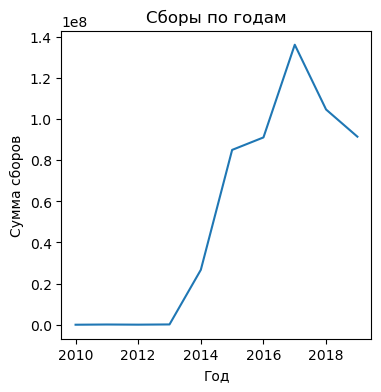

In [379]:
print(data.groupby('show_year')['box_office'].mean())
data.groupby('show_year')['box_office'].mean().plot(figsize=(4,4))
plt.title('Сборы по годам')
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

С течением времени сборы становятся больше. Меньше всего сборов было в 2010 году, больше всего в 2017. Удобнее анализировать среднее значение, так как количество фильмов тоже увеличивалось

In [380]:
data.pivot_table(index='show_year', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
show_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


По таблице видно, что медианные и средние значения сильно отличаются. Скорее всего дело в выбросах

In [381]:
data[data['show_year'] > 2014].pivot_table(index='age_restriction', values='box_office',aggfunc='mean')

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,8.890961e+06
«12+» - для детей старше 12 лет,1.741938e+08
«16+» - для детей старше 16 лет,9.445309e+07
«18+» - запрещено для детей,5.146416e+07
«6+» - для детей старше 6 лет,1.760209e+08


In [382]:
data[data['show_year'] > 2014].pivot_table(index=['show_year','age_restriction'], values='box_office',aggfunc='mean')

box_office
show_year age_restriction                                     
2015      «0+» - для любой зрительской аудитории  9.719348e+06
          «12+» - для детей старше 12 лет         1.865217e+08
          «16+» - для детей старше 16 лет         6.766739e+07
          «18+» - запрещено для детей             4.115385e+07
          «6+» - для детей старше 6 лет           1.641849e+08
2016      «0+» - для любой зрительской аудитории  3.664118e+06
          «12+» - для детей старше 12 лет         1.488347e+08
          «16+» - для детей старше 16 лет         9.156345e+07
          «18+» - запрещено для детей             4.499291e+07
          «6+» - для детей старше 6 лет           1.721878e+08
2017      «0+» - для любой зрительской аудитории  7.653298e+07
          «12+» - для детей старше 12 лет         1.914982e+08
          «16+» - для детей старше 16 лет         1.549177e+08
          «18+» - запрещено для детей             6.565643e+07
          «6+» - для детей старше 6 лет           2.685809e+08
2018      «0+» - для любой зрительской аудитории  6.489800e+06
          «12+» - для детей старше 12 лет         2.129447e+08
          «16+» - для детей старше 16 лет         1.057923e+08
          «18+» - запрещено для детей             4.893903e+07
          «6+» - для детей старше 6 лет           1.486026e+08
2019      «0+» - для любой зрительской аудитории  5.915356e+06
          «12+» - для детей старше 12 лет         1.491788e+08
          «16+» - для детей старше 16 лет         7.164842e+07
          «18+» - запрещено для детей             5.531036e+07
          «6+» - для детей старше 6 лет           1.586734e+08

<Axes: xlabel='show_year,age_restriction'>

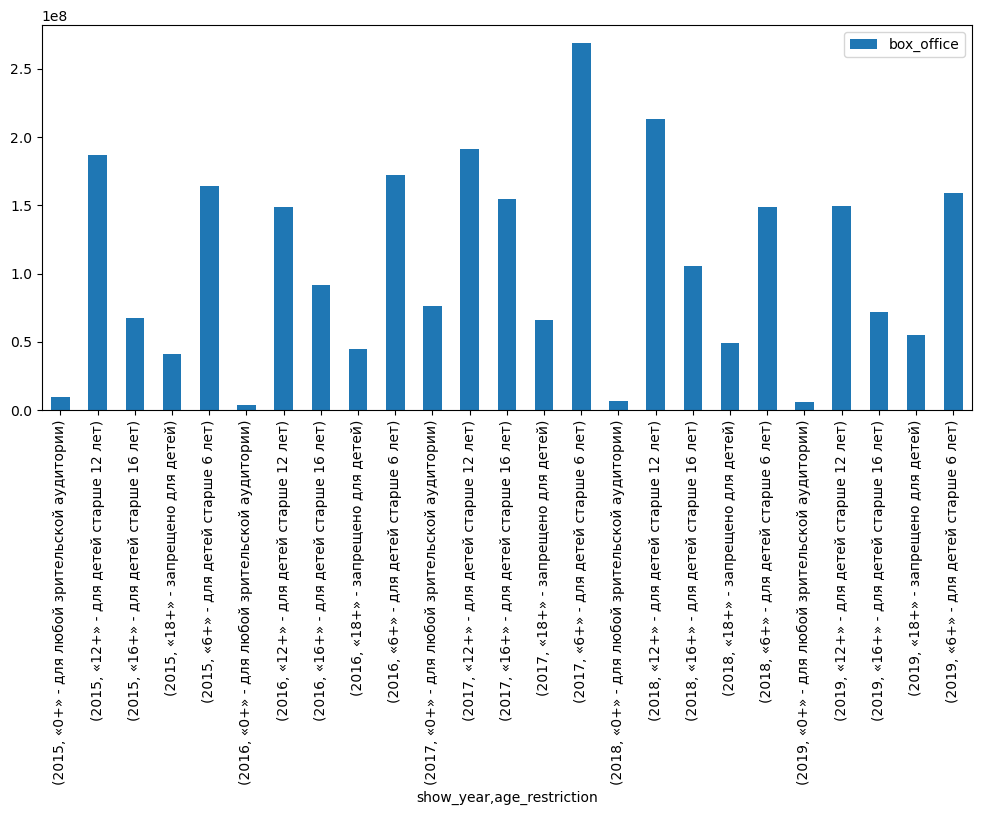

In [383]:
data[data['show_year'] > 2014].pivot_table(index=['show_year','age_restriction'], values='box_office',aggfunc='mean').plot(kind='bar',figsize=(12,5))

В среднем больше всего сборов на фильмы 12+ и 6+, возможно это связано с тем, что аудитория на эти фильмы шире и на них ходят семьями. Меньше сборов на фильмах 0+, что может быть связано с тем, что в основном это мультфильмы и собирают они меньшую аудиторию

В 2015 и 2018 году наиболее успешными были фильмы 12+, в остальные годы 6+. Распределение по годам подтверждает общую тенденцию к малым сборам у фильмов 0+

In [384]:
data_supported = data.loc[data['financing_source'].notna()].copy()
print(data_supported.head(10))

                                          title   puNumber  \
1281                              Пока еще жива  111005313   
1448                        Бесславные придурки  111003314   
1498                                  Невидимки  111004213   
1524                                      БЕРЦЫ  111004314   
1792                                   Братья Ч  111004414   
1853  Тайна Сухаревой башни. Чародей равновесия  114000115   
1869                     А зори здесь тихие..._  111002915   
1870                                Две женщины  111013714   
1902                                  Призрак_.  111001815   
1911                                   Ведьма .  111002215   

         show_start_date            type  \
1281 2013-10-11 12:00:00  Художественный   
1448 2014-03-28 12:00:00  Художественный   
1498 2013-09-10 12:00:00  Художественный   
1524 2014-05-05 12:00:00  Художественный   
1792 2014-04-23 12:00:00  Художественный   
1853 2015-02-18 12:00:00    Анимационный   
1869 2015

Для удобства выделили строки с информацией о государственной поддержке в отдельную таблицу

In [385]:
data_supported['support_value'] = data_supported['refundable_support']+data_supported['nonrefundable_support']

In [386]:
data_supported.groupby('production_country')['box_office'].sum().sort_values()

production_country
Россия - Грузия                               0.000000e+00
Россия, Бельгия, Финляндия                    0.000000e+00
Россия-Словакия-Чехия                         2.880195e+05
Россия, Германия, Великобритания              1.307120e+06
Россия, Германия, Казахстан, Польша, Китай    2.446886e+06
Россия, Армения                               3.363230e+06
Россия, Украина, Польша                       4.568857e+06
Россия, Франция, Латвия                       4.731240e+06
Россия, Латвия, Чешская Республика            2.136384e+07
Россия, Германия                              5.244492e+07
Россия, Италия                                5.438724e+07
Россия, Сербия                                3.076506e+08
Россия-Китай                                  3.335971e+08
Россия-Украина                                4.018045e+08
Россия                                        4.092556e+10
Name: box_office, dtype: float64

Больше всего сборов было на прокатах фильмов, созданных только Россией, скорее дело и в количестве фильмов, посмотрим

In [387]:
data_supported.groupby('production_country')['box_office'].mean().sort_values()

production_country
Россия-Словакия-Чехия                         2.880195e+05
Россия, Германия, Великобритания              1.307120e+06
Россия, Германия, Казахстан, Польша, Китай    2.446886e+06
Россия, Армения                               3.363230e+06
Россия, Украина, Польша                       4.568857e+06
Россия, Франция, Латвия                       4.731240e+06
Россия, Латвия, Чешская Республика            2.136384e+07
Россия, Германия                              2.622246e+07
Россия, Италия                                2.719362e+07
Россия                                        1.346235e+08
Россия, Сербия                                3.076506e+08
Россия-Китай                                  3.335971e+08
Россия-Украина                                4.018045e+08
Россия - Грузия                                        NaN
Россия, Бельгия, Финляндия                             NaN
Name: box_office, dtype: float64

Действительно, при рассмотрении средних значений картина иная. Картина производства России и Украины собрала больше, чем в среднем собирают картины производства России

In [388]:
data_supported.groupby('main_genre')['box_office'].sum().sort_values()

main_genre
детский        3.013652e+06
реальное ТВ    3.272110e+07
мелодрама      5.478897e+07
мюзикл         1.017050e+08
детектив       1.385475e+08
криминал       2.397939e+08
биография      5.168830e+08
семейный       5.844247e+08
боевик         5.959289e+08
триллер        7.004502e+08
ужасы          7.101232e+08
фэнтези        9.958366e+08
военный        1.017670e+09
приключения    1.205597e+09
история        1.455468e+09
неизвестно     1.481749e+09
фантастика     1.718204e+09
спорт          2.967768e+09
мультфильм     5.622014e+09
драма          9.490844e+09
комедия        1.247998e+10
Name: box_office, dtype: float64

Самый прибыльный жанр - комедии. Детские ожидаемо (из предыдцщих исследований) самые НЕприбыльные

In [389]:
def category_refund(value):
    a = value['support_value']
    if a<10000000:
        return 'малая поддержка'
    elif a<100000000:
        return 'средняя поддержка'
    elif a>100000000:
        return 'крупная поддержка'
    else:
        return 'нет данных'
    
data_supported['category_refund'] = data_supported.apply(category_refund, axis=1)

In [390]:
data_supported['category_refund'].value_counts()

category_refund
средняя поддержка    275
крупная поддержка     43
малая поддержка        7
нет данных             7
Name: count, dtype: int64

In [391]:
data_supported[data_supported['ratings']>0].groupby('category_refund')['ratings'].mean().sort_values()

category_refund
нет данных           5.385714
средняя поддержка    6.003077
малая поддержка      6.028571
крупная поддержка    6.395238
Name: ratings, dtype: float64

У проектов с крупной финансовой поддержкой рейтинг в среднем выше почти на 0.4 пункта

In [392]:
def category_budget(value):
    a = value['budget']
    if a<10000000:
        return 'малый бюджет'
    elif a<100000000:
        return 'средний бюджет'
    elif a>100000000:
        return 'крупный бюджет'
    else:
        return 'нет данных'
    
data_supported['category_budget'] = data_supported.apply(category_budget, axis=1)

In [393]:
data_supported['category_budget'].value_counts()

category_budget
средний бюджет    198
крупный бюджет    117
малый бюджет       17
Name: count, dtype: int64

In [394]:
data_supported[data_supported['ratings']>0].groupby('category_budget')['ratings'].mean().sort_values()

category_budget
малый бюджет      5.725000
средний бюджет    6.042162
крупный бюджет    6.086087
Name: ratings, dtype: float64

Здесь отличие то же. У проектов с большим бюджетом рейтинг выше

In [395]:
def total_money(value):
    return value['box_office']-value['budget']

data_supported['total_money'] = data_supported.apply(total_money,axis=1)

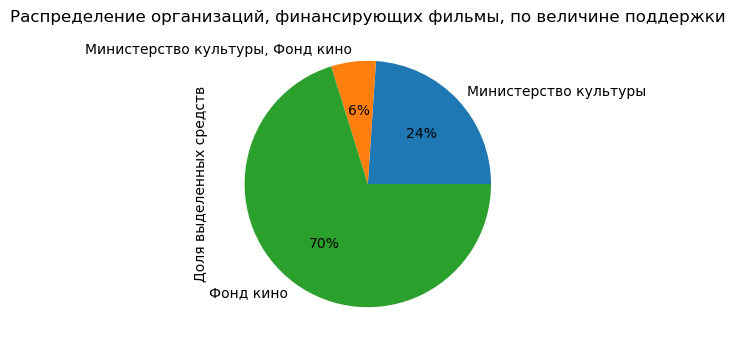

In [396]:
data_supported.groupby('financing_source')['support_value'].sum().plot(kind='pie',figsize=(4,4), autopct='%1.0f%%')
plt.title('Распределение организаций, финансирующих фильмы, по величине поддержки')
plt.ylabel('Доля выделенных средств')
plt.show()

Больше денег выделяет "Фонд кино"

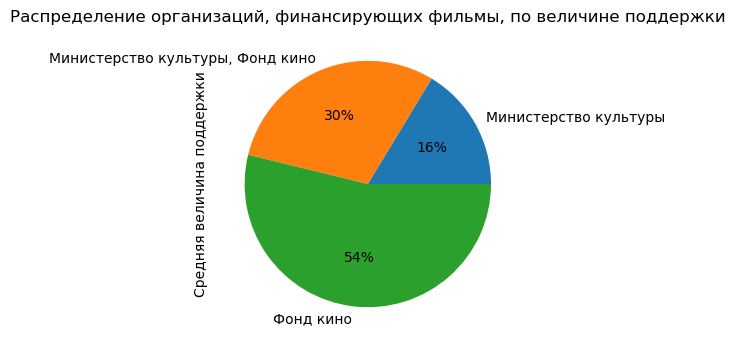

In [397]:
data_supported.groupby('financing_source')['support_value'].mean().plot(kind='pie',figsize=(4,4), autopct='%1.0f%%')
plt.title('Распределение организаций, финансирующих фильмы, по величине поддержки')
plt.ylabel('Средняя величина поддержки')
plt.show()

В среднем на фильм Фонд кино также выделяет больше. Поддержка от обоих фондов совместно в среднем сильно больше, чем поддержка от Министерства Культуры

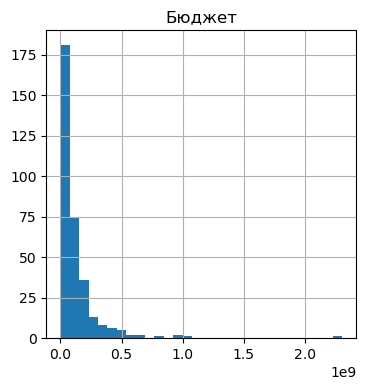

In [398]:
data_supported['budget'].hist(bins=30, figsize=(4,4))
plt.title('Бюджет')

plt.show()

Есть выбросы на значениях более 0.6х10^9, перед тем, как их отбросим, рассмотрим отдельно

In [399]:
data[data['budget']>600000000]['main_genre']

2919          драма
3350          драма
5436        фэнтези
7113    приключения
7170          драма
7463        история
7473     фантастика
Name: main_genre, dtype: object

Жанр драма встречается 3 раза, но на таком малом наборе значений выводы трудно сделать

In [400]:
data[data['budget']>600000000]['support_part'].sort_values()

7170    0.076929
7113    0.117133
5436    0.290443
7463    0.510204
7473    0.529661
3350    0.657702
2919    0.695916
Name: support_part, dtype: float64

Доля гос.поддержки тоже совсем разная, разве что можем сказать, что полностью бюджетных финансово успешных фильмов нет

In [401]:
data[data['budget']>600000000]['ratings'].sort_values()

7473    5.7
7113    5.8
7463    6.0
3350    6.6
7170    6.9
5436    7.7
2919    8.4
Name: ratings, dtype: float64

Фильмы с большим бюджетом получают достаточно хороший рейтинг

Продолжим анализ без этих значений

In [402]:
data_supported = data_supported.loc[data['budget']<600000000]

Отбросили выбросы

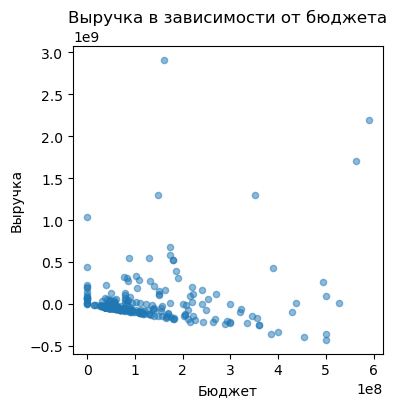

In [403]:
data_supported.plot(x='budget', y='total_money',kind='scatter', alpha=0.5, figsize = (4,4))
plt.title('Выручка в зависимости от бюджета')
plt.ylabel('Выручка')
plt.xlabel('Бюджет')
plt.show()

In [404]:
data_supported['total_money'].corr(data['budget'])

0.14792963235640486

А вот по выручке однозначных выводов сделать не можем. Есть проекты, которые получили большую выручку при большом бюджете, но общая тенденция - уменьшение выручки при увеличении бюджета

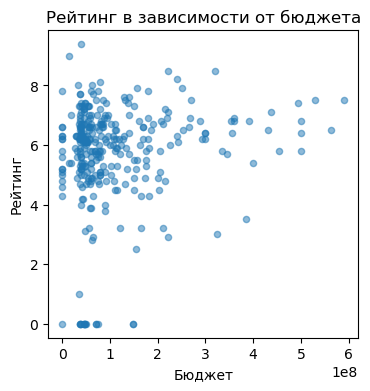

In [405]:
data_supported.plot(x='budget', y='ratings',kind='scatter', alpha=0.5, figsize = (4,4))
plt.title('Рейтинг в зависимости от бюджета')
plt.ylabel('Рейтинг')
plt.xlabel('Бюджет')
plt.show()

In [406]:
data_supported['budget'].corr(data['ratings'])

0.14035528684623316

Распределение по рейтингу также неоднозначное. В среднем, значения рейтинга в районе 6 баллов. При большем бюджете значения рейтинга не опускаются ниже 5, хотя есть и 2 фильма, у которых рейтинг ниже 4

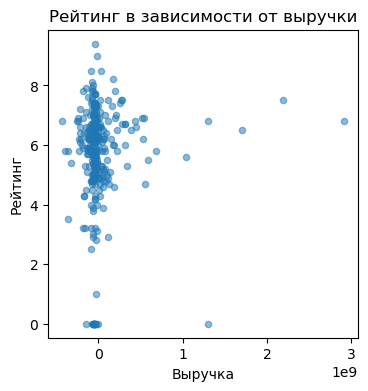

In [407]:
data_supported.plot(x='total_money', y='ratings',kind='scatter', alpha=0.5, figsize = (4,4))
plt.title('Рейтинг в зависимости от выручки')
plt.ylabel('Рейтинг')
plt.xlabel('Выручка')
plt.show()

In [408]:
data_supported['total_money'].corr(data['ratings'])

0.046469453117321216

Зависимости практически нет. Но есть проекты, по которым видно, что при большой выручке рейтинг ниже 5 не опускается

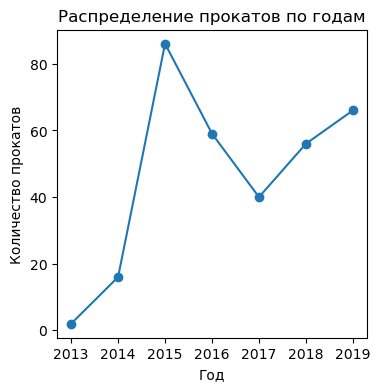

In [409]:
data_supported.groupby('show_year')['title'].count().plot(figsize=(4,4),style='-o')
plt.title('Распределение прокатов по годам')
plt.ylabel('Количество прокатов')
plt.xlabel('Год')
plt.show()

В 2015 году было наибольшее количество фильмов в прокате. Меньше всего в 2013. Стоит отметить, что до 2013 года нет данных о прокатах 

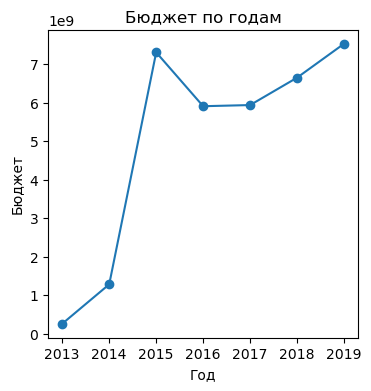

In [410]:
data_supported.groupby('show_year')['budget'].sum().plot(figsize=(4,4),style='-o')
plt.title('Бюджет по годам')
plt.ylabel('Бюджет')
plt.xlabel('Год')
plt.show()

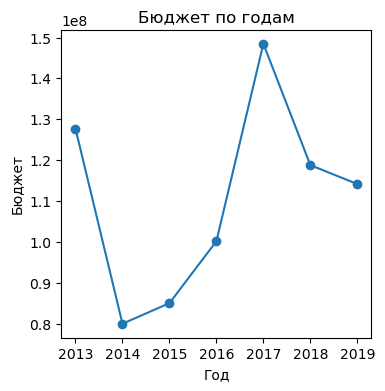

In [411]:
data_supported.groupby('show_year')['budget'].mean().plot(figsize=(4,4),style='-o')
plt.title('Бюджет по годам')
plt.ylabel('Бюджет')
plt.xlabel('Год')
plt.show()

С каждым годом суммарный бюджет на фильмы увеличивается. В период с 2016 по 2018 был небольшой спад

График по среднему бюджету показывает иную картину, в 2017 году были самые дорогие картины. Также пик есть в 2013 году

In [412]:
data.groupby('show_year')['main_genre'].apply(lambda x: x.value_counts().idxmax())

show_year
2010         драма
2011         драма
2012         драма
2013         драма
2014         драма
2015         драма
2016         драма
2017         драма
2018    неизвестно
2019    неизвестно
Name: main_genre, dtype: object

Почти каждый год больше всего спонсируют драматические фильмы, о 2018 и 2019 годах сведений не хватает

### Вывод

В результате работы над данными были выполнены следующие этапы:
- объединение исходных данных
- предобработка данных
- исследовательский анализ данных
- исследование данных

На этапе объединения исходных данных возникла необходимость изменить некоторые строки, которые мешали объединить таблицы. В столбце с номером прокатного удостоверения были найдены и удалены дубликаты.

Этап предобработки данных включил в себя:
1. Замену типов данных в столбцах рейтинга, прокатного номера и даты выдачи номера.
2. Заполненение пропусков. В столбце рейтинга и продюсера были внесены необходимые данные, которые удалось найти. Неизвестные значения рейтинга были заменены на 0, так как нулевых значений в начальном списке не было, значит их можно будет легко отсечь при анализе, неизвестные значение продюсера и рейтинга были заменены на "неизвестно". Оставшиеся пропуски не были заполнены, так как их количество было по 90% в 5 столбцах.
3. Выявление и замена дубликатов. Явных дубликатов не обнаружено. Обнаружены дубликаты в названиях фильмов, но они объясняются тем, что фильмы выходили в прокат в разные даты.
4. Изучены категориальные значения. Обнаружено множество различных написаний одних и тех же названий в столбцах стран, имен продюсера и режиссера, жанров. Заменены неявные дубликаты в названиях типов фильмов.
5. Просмотрены количественные значения. Отредактированы пропуски в столбце бюджета.
6. Добавлены столбцы с годом выпуска в прокат, главный режиссер, главный жанр, доля государственной поддержки в бюджете

На этапе исследовательского анализа данных выявили следующее:
- количество фильмов в прокате увеличивалось с каждым годом, в 2015 году был всплеск выпуска в прокат
- сумма сборов была пиковой в 2017 году, минимальные сборы получали в 2010-2013 годах
- медианные и средние значения сборов сильно отличались, что говорит о том, что присутствуют очень успешние фильмы, но их не много
- В среднем больше всего сборов на фильмы 12+ и 6+, возможно это связано с тем, что аудитория на эти фильмы шире и на них ходят семьями. Меньше сборов на фильмах 0+, что может быть связано с тем, что в основном это мультфильмы и собирают они меньшую аудиторию
- В 2015 и 2018 году наиболее успешными были фильмы 12+, в остальные годы 6+. Распределение по годам подтверждает общую тенденцию к малым сборам у фильмов 0+


На этапе анализа фильмов с гос. поддержкой выяснили:
- самый прибыльный жанр - комедия
- более финансово успешные и рейтинговые фильмы с крупной гос.поддержкой и бюджетом
- крупную сумму на фильм можно получить у Фонда кино
- 2015 году было наибольшее количество фильмов в прокате, меньше всего в 2013, до 2013 данных о фильмах с господдержкой нет
- общий бюджет на фильмы с каждым годом растет, но средний бюджет на фильм был максимальным в 2017 и всплеск виден в 2013
- фонды отдают предпочтение фильмам жанра "драма"